 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Project in Ensemble Techniques

<a id='Imports'></a>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Import all required modules

In [340]:
%matplotlib inline

from colorama import init, Fore, Back, Style
import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC
import pickle as pickle

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Common Functions 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> List of common functions to be fine tunned in successive projects based on variour data and learning. Right now, it may not do everything that every hence it needs caution if you copy - paste for different workflow


In [341]:
# Every project should call this function to set the stage for the project
# I need to find out more to do this section - For sure this will go 
# for frequent update
def bootstrap():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 3)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Print Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">We will have many functions this section which can help write text into console

In [342]:
# The project will call print_debug_msg(...) to print all debug logs.
# It is easy to switch off at once. We should find a way to do this
# in a more OOO way like constants/modules/external factor/etc...like 
# log4j configuration available in Java world
def print_debug_msg(*args, **kwargs):
    if (True == True):
        print("****** Start Debugging ******")
        for data in args:
            print(f"{data}", end=' ')
        print(f"\n")
        for key,value in kwargs.items():
            print("%s = %s" % (key, value))
        print("****** End Debugging ******")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will print dataframe with formatting. In future we need to perform more formatting....

In [343]:
def print_df_details(df):
    print("\n****** Start Dataframe Details ******")
    print("Dataframe Shape is ")
    print(df.shape)
    print("Dataframe Info is ")
    print(df.info())
    print("Dataframe random records ")
    display(df.sample(5) if len(df) > 5 else df.sample(1))
    print("****** End Dataframe Details ******\n")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will print model metrics. We will need to add functionality to analyse the metrics and provide report. I basically wanted to check if there is a better way to present this so that metrics are captured separately - may be in a searpate file or something...more thoughts ?

In [344]:
# This function should be enhanced to print more details going forward
def print_metrics(test, labels):
    #print(f"accuracy = {accuracy_score(test, labels)} "
          #f"precision = {precision_score(test, labels, pos_label='Yes')} "
          #f"recall = {recall_score(test, labels, pos_label='Yes')} "
          #f"f1-score = {f1_score(test, labels, pos_label='Yes')}")
    print("classification  Matrix:\n",classification_report(test,labels))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function to print inference. Need to check how to add color, text, manicure, pedicure of the text, etc. This will need enhancement in the same way like print_metrics function

In [345]:
# It prints given value and text. However we need to think more to make sure
# we are able to highlight the importants inference accordingly
def print_inference(value, txt):
    if (type(value) == str):
        print(f"[{value}] {txt}")
    else:
        print(f"{value} {txt}")
    print("\n\n")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">This function will print binary class confusion matrics. For multi-class, we should check whether we should enhance this or something different.

In [346]:
def print_binary_cm(y_test, predicted_labels, index=['NO','YES']):
    cm = metrics.confusion_matrix(y_test, predicted_labels)
    print(y_test.value_counts())
    print(cm)
    cm_df = pd.DataFrame(cm, index = index)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, fmt="d", annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Dataframe Functions

## <span style="font-family: Trebuchet MS; font-size:0.7em;color:darkorange;"> Function will read file from 'fqfn' (Fully Qualified File Name) and convert it into data frame. It prints sample data and info on the screen before returing the dataframe.

In [347]:
# Read file and convert it to Dataframe
def file_to_df(fqfn, file_type='csv'):
    df = 'None'
    # We are only handling csv files. How about .dat
    # We are also using "skipinitialspace" parameter so that we 
    # can save some time in preprocessing later (ie, we should do strip)
    if (file_type == 'csv'):
        df = pd.read_csv(fqfn, skipinitialspace = True)
    else:
        raise ValueError('Unsupported filetype ', file_type)
    print_df_details(df)
    return df

## <span style="font-family: Trebuchet MS; font-size:0.7em;color:darkorange;"> Function to merge dataframes. Do we need to handle more than two dataframe - i think it will be a bad practice to collect all dataframe and call for merge. As of today, this function will check common column name to perform merge on the column in the given dataset. If there is nothing common between src_df and dest_df, it will do concat the dataframe with outter join. We will need to do more checks in this function to make it more generalized function to perform inner join, left join, etc.

In [348]:
# Useful to merge/contact two datafrme. Will it be only two DF always
# It is possible to get more df hence the function should support 
# variable arguments with limit or some other better way. If we are to
# support more than two dataframe we should build a logic to find join
# condition across the files.
def merge_df(src_df, dest_df):
    df = None
    df1 = set(src_df.columns)
    df2 = set(dest_df.columns)
    col = list(df1 & df2)
    
    # We have common column between DF hence
    # merge using column.
    if (len(col) == 1): # Do column wise merge
        df = src_df.merge(dest_df,on=col[0])
        assert((src_df.columns.size + dest_df.columns.size -1) == df.columns.size)
    else:
        df = pd.concat([src_df,dest_df],join='outer',axis=0)
    # print_df_details(df)
    return df

# Few unit testing - we should find a better way to incorporate like 
# production vs test, etc. For now, we are working around using
# comment/uncomment mode.

#s1 = pd.Series(list('abc'))
#s2 = pd.Series(list('def'))
#print_df_details(merge_df(pd.get_dummies(s1), pd.get_dummies(s2)))

#s1 = pd.Series(list('abc'))
#s2 = pd.Series(list('ade'))
#print_df_details(merge_df(pd.get_dummies(s1), pd.get_dummies(s2)))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Data Analysis and Cleaning Functions


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Functions will help perform data analysis and cleaning. They are analysing from 5-point summary, finding skewness and provide inferences, etc. There will be functions to perform type conversion, imputing values, removing records part of imputation, etc. The encoding functions are also coming under this bucket. Generally Data analysis and Cleaning is a big bucket

In [349]:
# To start with - tried using the formula. However later figured out
# functions like 'skew' in dataframe which provides the skenwess for
# all numeric data. Currently making use of the skew function later
# we need to check if there is a better way to get the skewness.
# Irrespective of that - we should find a better way to convey almost
# normal, slightly left skewed, extreme right skewed, etc.
def find_skeweness(data):
    #Skew = 3 * (Mean – Median) / Standard Deviation
    series = data.skew(axis='index',skipna=True,numeric_only=True)
    for column in data.select_dtypes(include=[np.number]).columns:
        if (series[column] == float(0)):
            print_inference(column, " is normally distributed")
        elif (series[column] < float(0)):
            print_inference(column, " is left skewed")
        elif (series[column] > float(0)):
            print_inference(column, " is right skewed")

In [350]:
# Trying to analyse five point summary details and tyring for automation
def five_point_summary(data):
    # Summary Data and Index
    sd = None
    si = ['count','unique','top','freq','mean','std','min','25%','50%','75%','max']
    
    # Columns in dataframe
    columns = data.columns
    
    # For now - let us use transposed describtion and print it
    sd = data.describe(include='all').T
    display(sd)
    
    # Number of rows and columns in the dataframe
    nr = data.shape[0]
    nc = data.shape[1]
    
    # Inferences based out of count
    # Do this for all column
    for column in columns:
        if (int(sd[si[0]][column]) != nr):
            print_inference(column, "is having some null or empty row or missing value")
        
    # Inferences based out of unique
    cc = []
    for column in columns:
        if (sd[si[1]][column] >= 2 and sd[si[1]][column] <= 5):
             cc.append(column)
    if (len(cc) > 0):
        print_inference(cc, "can be a category column")
        
    # Inferences based out of top and freq
    # Balanced column or not
    id_c = []
    nm_c = []
    bl_c = []
    imbl_c = []
    tpercent = 15
    for column in columns:
        freq = sd[si[3]][column]
        uv = sd[si[1]][column]
        count = int(sd[si[0]][column])
        top = sd[si[2]][column]
        tval = round(tpercent * count/100)
        print_debug_msg(freq, uv, count, tval, column)
        
        if (math.isnan(freq)):
            nm_c.append(column)
        elif (freq == 1):
            id_c.append(column)
        else:           
            # Freq value should ideally be less than or equal 
            # to (count/unique + tval). We need to check and find
            # more closer formula
            if (freq > abs(((count/uv) + tval))):
                imbl_c.append(column)
            else:
                bl_c.append(column)
                
    if (len(id_c) > 0):
        print_inference(id_c," is an index column - we can drop")
    if (len(nm_c) > 0):
        print_inference(nm_c," is an numeric column")
    if (len(bl_c) > 0):
        print_inference(bl_c," is an blanced column")
    if (len(imbl_c) > 0):
        print_inference(imbl_c," is an imbalanced column")
    
    # Infereance based out of mean, median, etc
    # Skewness
    find_skeweness(data)
#five_point_summary(data)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Encode Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will do encoding for categorical feature in a dataset. It will return new dataset. <li>If the feature is of type numeric (other than [0,1]) - it will use 1-Hot Encoding</li> <li>If the feature is of type categories - it will use getDummies function</li> <li>If the feature is in use_le_list - it will use label encoder</li> TODO: We should find a way to auto detect for label encoding. Basically we need to know the ordinality for a feature.


In [351]:
def encod_category_data(data, use_le_list, skip_data_list):
    new_df = data
    
    # We should get all the columns having category as type
    cdata = data.select_dtypes(include='category').columns
    
    # Iterate over all the column and 
    for column in cdata:
        #print(f"Processing {column}")
        if (column in skip_data_list):
            pass 
        elif (data[column].cat.categories.dtype == 'int64'):
            if (np.isin(data[column].dropna().unique(), [0, 1]).all()):
                new_df = pd.get_dummies(new_df, columns=[column], drop_first=True)
            else:
                raise ValueError('Unsupported - Found integer other than 0,1 in ', column)
                #encoder = OneHotEncoder()
                #print(data[column].unique())
                #encoded = encoder.fit_transform(data[column].values).toarray() 
                #print(encoded)
        elif (column in use_le_list):
            print("Label encoding is not implemented yet")
            raise ValueError('Unsupported label encoding asked for ', column)
        else:
            new_df = pd.get_dummies(new_df, columns=[column], drop_first=True)
    print_debug_msg(new_df.columns, " encoded dataframe columns")
    return new_df

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Data Patching Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> The functions related to converting types, removing row based on column value, changing a column value, dropping column

In [352]:
# Function will help convert list of columns type as Int64. 
# We should add check and balance to make it more complete
def convert_to_int64(columns, df):
    for column in columns:
        df[column] = df[column].astype('int64')
    return df

In [353]:
# Function will help convert list of columns type as 'category'.
# Think - Why python is not having category as type ?
# We should add check and balance to make it more complete 
# like convert_to_int64
def convert_to_category(columns, df):
    for column in columns:
        df = df.astype({column: 'category'})
    return df

In [354]:
# The given set of columns will be dropped from the dataframe
# Caller should get the new dataframe and update it
def drop_column(columns, df):
    return df.drop(columns=columns)

In [355]:
# This function should be enhanced to automatically decide whether given
# dataset needs normalization or it needs standardization. For now it does
# Normalization only
def standardize_or_normalize(df):
    # perform a robust scaler transform of the dataset
    scaler = MinMaxScaler()
    norm_df = pd.DataFrame(scaler.fit_transform(df),
                           columns = list(df.select_dtypes(include=np.number).columns))
    return norm_df

In [356]:
# Function can be used to find all column having NA.
# This will return column name as list if they need to be 
# fixed for NaN
def find_nan(df):
    nan_list = df.columns[df.isna().any()].tolist()
    #print(f"Column {nan_list} is having NaN - To be Fixed")
    return nan_list

In [357]:
# Function to update NaN with Mean. Can we further 
# enhance to do the job automatically like Mean/Median/Mode
# or something else
def replace_nan_with_mean(df, columns):
    for column in columns:
        new_value=df[column].mean()
        df[column].fillna(value=new_value, inplace=True)
    return df

In [358]:
# This function will use SMOTENC to oversample the given
# data. Resampling looks like big subject, hence this 
# function should be optimized to do more in automated way
def do_resample(df, target):
    index = df.columns.get_loc(column)
    X_resampled , Y_resampled = SMOTENC(categorical_features=[index]).fit_resample(df.drop(target,axis=1), df[target])
    return X_resampled, Y_resampled

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Data Visualization

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Function takes DataFrame as input, finds all categorical variable in it and creates the pie chart for all of them. We may need more configuration parameters to consider like ignore few category feature, etc.

In [359]:
# Iterate through all column in dataframe. Check all categorical column. 
# If they are categorical - apply group by function to generate pie plot
def plot_piechart_for_categorical_type(data):
    total_categorical_column = len(data.select_dtypes(include='category').columns)
    column_in_plot = 3 # Can we fix it?
    rows_in_plot = int(total_categorical_column/column_in_plot) if total_categorical_column % 2 == 0 else int((total_categorical_column/column_in_plot + 1))
    print(f"Total categorical column is {total_categorical_column} and identified rows are {rows_in_plot} "
          f"and identified columns are {column_in_plot}")
    fig, axes = plt.subplots(rows_in_plot,column_in_plot, figsize=(30, 15))
    ax_row,ax_col = 0,0
    for column in data.columns:
        if (data[column].dtype.name == 'category'):
            #print(f"{column} is a category and plotting in {ax_row}{ax_col}")
            #print(type(df.groupby(column).size()))
            #print(df.groupby(column).size())
            cat_data = df.groupby(column).size()
            #df.groupby(column).size().plot(kind='pie', ylabel=column, legend=True, autopct='%.1f', textprops={'fontsize': 15}, ax=axes[ax_row,ax_col])     
            subplt=cat_data.plot(kind='pie', title=column, ylabel='', 
                        legend=False, labels=None, autopct='%.2f', textprops={'fontsize': 15}, ax=axes[ax_row,ax_col])
            subplt.legend(cat_data.index, bbox_to_anchor=(0.1, 0.5))
            ax_col += 1
            if (ax_col == column_in_plot):
                ax_row += 1
                ax_col = 0
    # If we have odd number of column - we will be left 
    # with one plot unsold, hence remove it
    if (total_categorical_column % 2 != 0):
        fig.delaxes(axes[ax_row,ax_col])
    plt.tight_layout()
    plt.show()
            

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Heatmap & Correlation

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will create heatmap and analyse weak and strong correlation. We need to automate min and max threshold finding...how..? For now functions below will display heatmap and suggest strong and weak correlation variables.

In [360]:
def __get_correlation_values(data, min_threashold, max_threashold):
    corr_mat = data.corr()
    data = corr_mat.unstack().sort_values()   # Data will be one side of the diagonal 
    corr_set=set()
    for items in data.iteritems():
        if (np.abs(items[1]) > min_threashold and np.abs(items[1]) <= max_threashold):
            if (items[0][0] != items[0][1]):   # Ignore same feature will show always = 1
                not_unique = int(0)
                if (len(corr_set) == 0):
                    corr_set.add(items)
                for item in corr_set:
                    if (item[1] == items[1]):
                        elements = set(item[0]) & set(items[0])
                        if (len(elements) == 2):
                            not_unique = 1;
                if (not_unique == 0):
                    corr_set.add(items)
    return corr_set

In [361]:
def analyse_correlation(data):
    sns.heatmap(data.corr(), cmap="plasma", vmin=-1, vmax=1, annot=True, linewidth=1)
    plt.show()
    corr_set = __get_correlation_values(data.corr(), 0.25, 0.5)
    print("Weakest correlations are ")
    for corr in corr_set:
        print(f"{corr}")
    print("Strong correlations are ")
    corr_set = __get_correlation_values(data.corr(), 0.7, 1.0)
    for corr in corr_set:
        print(f"{corr}")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Histogram 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will create histogram for all numeric data feature with random color

In [362]:
def plot_hist(data):
    # We should get all the columns having category type
    columns = data.select_dtypes(include=[np.number]).columns
    print_debug_msg(columns)
    
    cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # Iterate over all the column and plot histograms on the 
    # same axis
    count = 0
    for column in columns:
        plt.hist(df[column], bins=25, alpha=0.45, color=cycle_colors[count])
        count += 1
        plt.legend([column])
        plt.show()

In [363]:
def create_box_plot(data):
    plt.figure(figsize=(17,10))
    sns.boxplot(data=df)
    plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Pairwise Relationships

In [364]:
# THis function will help understand how each independent 
# variable help understand the relationship with target
# variable.
def plot_pair_relationship(df, target):
    columns = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(4,4))
    sns.pairplot(df, hue=target, diag_kind='kde')
    title = "Numeric column correlation with respect to " + target
    plt.title(title)
    plt.show()

In [365]:
# Function to display count information to determine 
# how the data is spread across categories for all 
# categorical variable.
def category_count_plot(df, target):
    columns = df.select_dtypes(include=['category']).columns  # Column should be category before calling this function
    plt.figure(figsize=(8,5))
    print_debug_msg("count plot", columns)
    for column in columns:
        if (column != target):
            sns.countplot(x=column,data=df, palette='rainbow',hue=target)
            title = "Count of " + column + " Separated by " + target
            plt.title(title)
            plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Model Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Functions are helping in train and test model, etc

In [366]:
# Split given data frame vs Target
def split_xy(target, df):
    X = df.drop(target,axis=1)     
    Y = df[target]
    return X, Y

In [367]:
# Temporary function to prepare dataframe with model metrics
# Useful only in the case of Classification algorithm. The report will be
# something like below,
#
#           Model         accuracy  precision  recall  f1-score support Report
#  0         KNN           0.998     0.998     0.998    0.998    None   Train
#  1         KNN           0.810     0.817     0.810    0.809    None    Test
#  2   LogisticRegression  0.830     0.830     0.830    0.830    None   Train
#  .....................
#  .....................
# 
def getClassificationDashboard(y_data, label, model_name, report='test', portal_df=None):
    index = [] if portal_df == None else list(portal_df.index.values)
    if (len(index) == 0):   # First time
        portal_index = ['Model', 'accuracy', 'precision', 'recall', 'f1-score', 'support', 'Report']
        portal_df = pd.DataFrame(columns=portal_index);
    accuracy = accuracy_score(y_true=y_data, y_pred=label)
    prfs = list(precision_recall_fscore_support(y_true=y_data, y_pred=label, average='weighted'))
    prfs.insert(0, model_name)
    prfs.insert(1, accuracy)
    prfs.insert(6, report)
    pd_series = pd.Series(prfs, index = portal_df.columns)
    portal_df = portal_df.append(pd_series, ignore_index=True)
    return portal_df

In [368]:
# THis function is an attemp to unify the get model function.
# I need to check how we can fine tune automatically for best hyper
# parameters, etc. Today it is another constant function aligned to this
# project :)
def get_model(name, params=None):
    #params_svm = {"kernel":"rbf", "C":0.1, "gamma":0.1, "class_weight":"auto"}
    model = None
    if (name == 'LogisticRegression'):
        model = LogisticRegression(solver="liblinear")
    elif (name == 'KNN'):
        model = KNeighborsClassifier()
        model.set_params(**params)
    elif (name == 'SVM'):
        model = svm.SVC();
    elif (name == 'DTC'):
        model = DecisionTreeClassifier(criterion='entropy')
    elif (name == 'Stacking'):
        level0 = list()
        level0.append(('lr', LogisticRegression()))
        level0.append(('knn', KNeighborsClassifier()))
        level0.append(('cart', DecisionTreeClassifier()))
        level0.append(('svm', svm.SVC()))
        level1 = DecisionTreeClassifier(criterion='entropy')
        model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    elif (name == 'Xgboost'):
        model = XGBClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 1000, n_jobs=4, random_state = 0,
                    min_child_weight= 1, colsample_bytree= 0.8, gamma= 0.5)
        
    return model

In [369]:
# Function to be called to evaluate using LogisticRegression
def eval_lr(X_train, Y_train, X_test, Y_test):
    model = get_model('LogisticRegression')
    model.fit(X_train, Y_train)
    pl = model.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, model.predict(X_train), 'LogisticRegression', 'Train')
    df2 = getClassificationDashboard(Y_test, model.predict(X_test), 'LogisticRegression', 'Test')
    return merge_df(df1, df2)

In [370]:
# Function to be called to evaluate data using KNN
def eval_knn(X_train, Y_train, X_test, Y_test):
    scores = []
    for k in range(1,50): # Loop will help to find good - K value
        #NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
        NNH = get_model('KNN',{"n_neighbors":k, "weights":"distance" })
        NNH.fit(X_train, Y_train)
        scores.append(NNH.score(X_test, Y_test))
    k_value = scores.index(np.max(scores))
    print_debug_msg(k_value, " is the measured good K value")
    #NNH = KNeighborsClassifier(n_neighbors=k_value, p=1, weights = 'distance')
    NNH = get_model('KNN',{"n_neighbors":k_value, "p":1, "weights":"distance" })
    NNH.fit(X_train, Y_train)
    pl = NNH.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, NNH.predict(X_train), 'KNN', 'Train')
    df2 = getClassificationDashboard(Y_test,NNH.predict(X_test), 'KNN', 'Test')
    return merge_df(df1, df2)

In [371]:
# Function to be called to evaluate data using SVM
def eval_svm(X_train, Y_train, X_test, Y_test):
    svm_clf = get_model('SVM')
    svm_clf.fit(X_train , Y_train)
    pl = svm_clf.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, svm_clf.predict(X_train), 'SVM', 'Train')
    df2 = getClassificationDashboard(Y_test,svm_clf.predict(X_test), 'SVM', 'Test')
    return merge_df(df1, df2)

In [372]:
# Function to be called to evaluate data using DecisionTreeClassifier
def eval_dtc(X_train, Y_train, X_test, Y_test):
    #dtc=DecisionTreeClassifier(criterion='entropy')
    dtc=get_model('DTC', {"criterion":"entropy"})
    dtc.fit(X_train, Y_train)
    pl = dtc.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, dtc.predict(X_train), 'DTC', 'Train')
    df2 = getClassificationDashboard(Y_test,dtc.predict(X_test), 'DTC', 'Test')
    return merge_df(df1, df2)

In [373]:
# Evaluation function for stacking
def eval_stacking(X_train, Y_train, X_test, Y_test):
    model = get_model('Stacking')
    model.fit(X_train, Y_train)
    pl = model.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, model.predict(X_train), 'Stacking', 'Train')
    df2 = getClassificationDashboard(Y_test,model.predict(X_test), 'Stacking', 'Test')
    return merge_df(df1, df2)

In [374]:
# Evaluation function for stacking
def eval_xgboost(X_train, Y_train, X_test, Y_test):
    model = get_model('Xgboost')
    model.fit(X_train, Y_train)
    pl = model.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, model.predict(X_train), 'Xgboost', 'Train')
    df2 = getClassificationDashboard(Y_test,model.predict(X_test), 'Xgboost', 'Test')
    return merge_df(df1, df2)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:pink;"> The above eval_**** functions can be combined into a single function. But right now not interested in doing this if - else. Let me find something better and rewrite this again.

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Helper functions to save and load model in disc

In [375]:
def load_model_and_test(pkl_file, X_test, Y_test):
    model = pickle.load(open(pkl_file,'rb'))
    label = model.predict(X_test.filter(items=[0], axis=0))
    assert(label[0] == Y_test.iloc[0])
    print("\n\n FINISHED - You don't see this if there is a error \n\n")

In [376]:
def save_model(model, X_train, Y_train):
     if (model != None):
        model.fit(X_train, Y_train)
        pickle.dump(model, open('model.pkl','wb'))

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:2.2em;color:#f98702;"> PART - A - TELECOM DOMAIN


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> We are given with two CSV file
<a id='csvfiledata'></a>
 
<font color=darkblue> TelcomCustomer-Churn_1:
    <li> Customer information such as gender, they have partner, Dependents </li>
    <li> Service that they have opt-in such as PhoneService, Number of Lines, InternetService Type, OnlineSecurity. </li>
        <li> It showsn tenure </li></font>
<font color=darkblue> TelcomCustomer-Churn_2:
    <li> Customer churn information </li>
    <li> Service that they use such as OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies </li>
    <li> Contract Period </li>
    <li> Billing Preference, Payment Method, Monthly and Total charges. </li></font>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Data Understanding & Exploration

#### <font color=darkorange>Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.


In [377]:
data1 = file_to_df('TelcomCustomer-Churn_1.csv')


****** Start Dataframe Details ******
Dataframe Shape is 
(7043, 10)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
None
Dataframe random records 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
2371,2712-SYWAY,Female,0,No,No,1,Yes,Yes,No,No internet service
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No
4300,1131-ALZWV,Female,0,No,No,24,Yes,Yes,No,No internet service
1299,4566-QVRRW,Female,0,Yes,No,11,Yes,No,DSL,No
2218,5494-WOZRZ,Female,0,Yes,Yes,71,Yes,No,DSL,Yes


****** End Dataframe Details ******



 
#### <font color=darkorange>Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. 


In [378]:
data2 = file_to_df('TelcomCustomer-Churn_2.csv')


****** Start Dataframe Details ******
Dataframe Shape is 
(7043, 12)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7032 non-null   float64
 11  Churn             7043 non-null   object 
dtypes: float64(2), object(10)
memory usage: 660.4+ KB
None
Dataframe random records 


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1752,7801-CEDNV,No,No,No,No,No,One year,No,Credit card (automatic),48.70,1421.75,No
3312,9122-UMROB,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.30,No
1607,4154-AQUGT,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.05,1169.35,Yes
2036,8775-ERLNB,No,No,No,No,No,Month-to-month,No,Electronic check,74.30,74.30,No
6921,5243-SAOTC,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.85,4308.25,No


****** End Dataframe Details ******



### <font color=darkorange>Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

In [379]:
data = merge_df(data1,data2)

### <font color=darkorange>Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. 


In [380]:
# The merged dataframe should have one column lesser than the total column 
# present in the individual data frame. If not we should assert
assert((data1.columns.size + data2.columns.size -1) == data.columns.size)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Data Cleaning & Analysis

### <font color=darkorange> Impute missing/unexpected values in the DataFrame. 

In [381]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000,7043,7043,7043.000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000,7032.000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162,NaN,NaN,32.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.762,2283.300,NaN
std,NaN,NaN,0.369,NaN,NaN,24.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090,2266.771,NaN
min,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250,18.800,NaN
25%,NaN,NaN,0.000,NaN,NaN,9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500,401.450,NaN
50%,NaN,NaN,0.000,NaN,NaN,29.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350,1397.475,NaN
75%,NaN,NaN,0.000,NaN,NaN,55.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850,3794.738,NaN


#### <font color=darkblue> There are lot of categorical variable.

#### <font color=darkblue> SeniorCitizen is having either 0 or 1. It can be converted to Category type
#### <font color=darkblue> CustomerId something we can drop (or use it as index)
#### <font color=darkblue> Churn is the target variable, TotalCharges, MonthlyCharges will be Float
#### <font color=darkblue> Other column can be converted to Category type

In [382]:
df = data
non_categorical_column = ['customerID','TotalCharges','tenure','MonthlyCharges']
for column in df.columns:
    if column not in non_categorical_column:
        df = df.astype({column: 'category'})
df.drop(columns=['customerID'], inplace=True)
print(df.shape)

(7043, 20)


In [383]:
column_list = find_nan(df)
print(column_list)

['TotalCharges']


#### <font color=darkblue> TotalCharges is having NaN. Since it is less number of column - we can replace with mean

In [384]:
df = replace_nan_with_mean(df, column_list)
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.0,7043,7043,7043.000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000,7043.000,7043
unique,2,2.0,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,0.0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,5901.0,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,32.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.762,2283.300,NaN
std,NaN,NaN,NaN,NaN,24.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090,2265.000,NaN
min,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250,18.800,NaN
25%,NaN,NaN,NaN,NaN,9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500,402.225,NaN
50%,NaN,NaN,NaN,NaN,29.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350,1400.550,NaN
75%,NaN,NaN,NaN,NaN,55.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850,3786.600,NaN


### <font color=darkorange> Make sure all the variables with continuous values are of ‘Float’ type.  [For Example: MonthlyCharges, TotalCharges]

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

### <font color=darkorange> Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. 

Total categorical column is 17 and identified rows are 6 and identified columns are 3


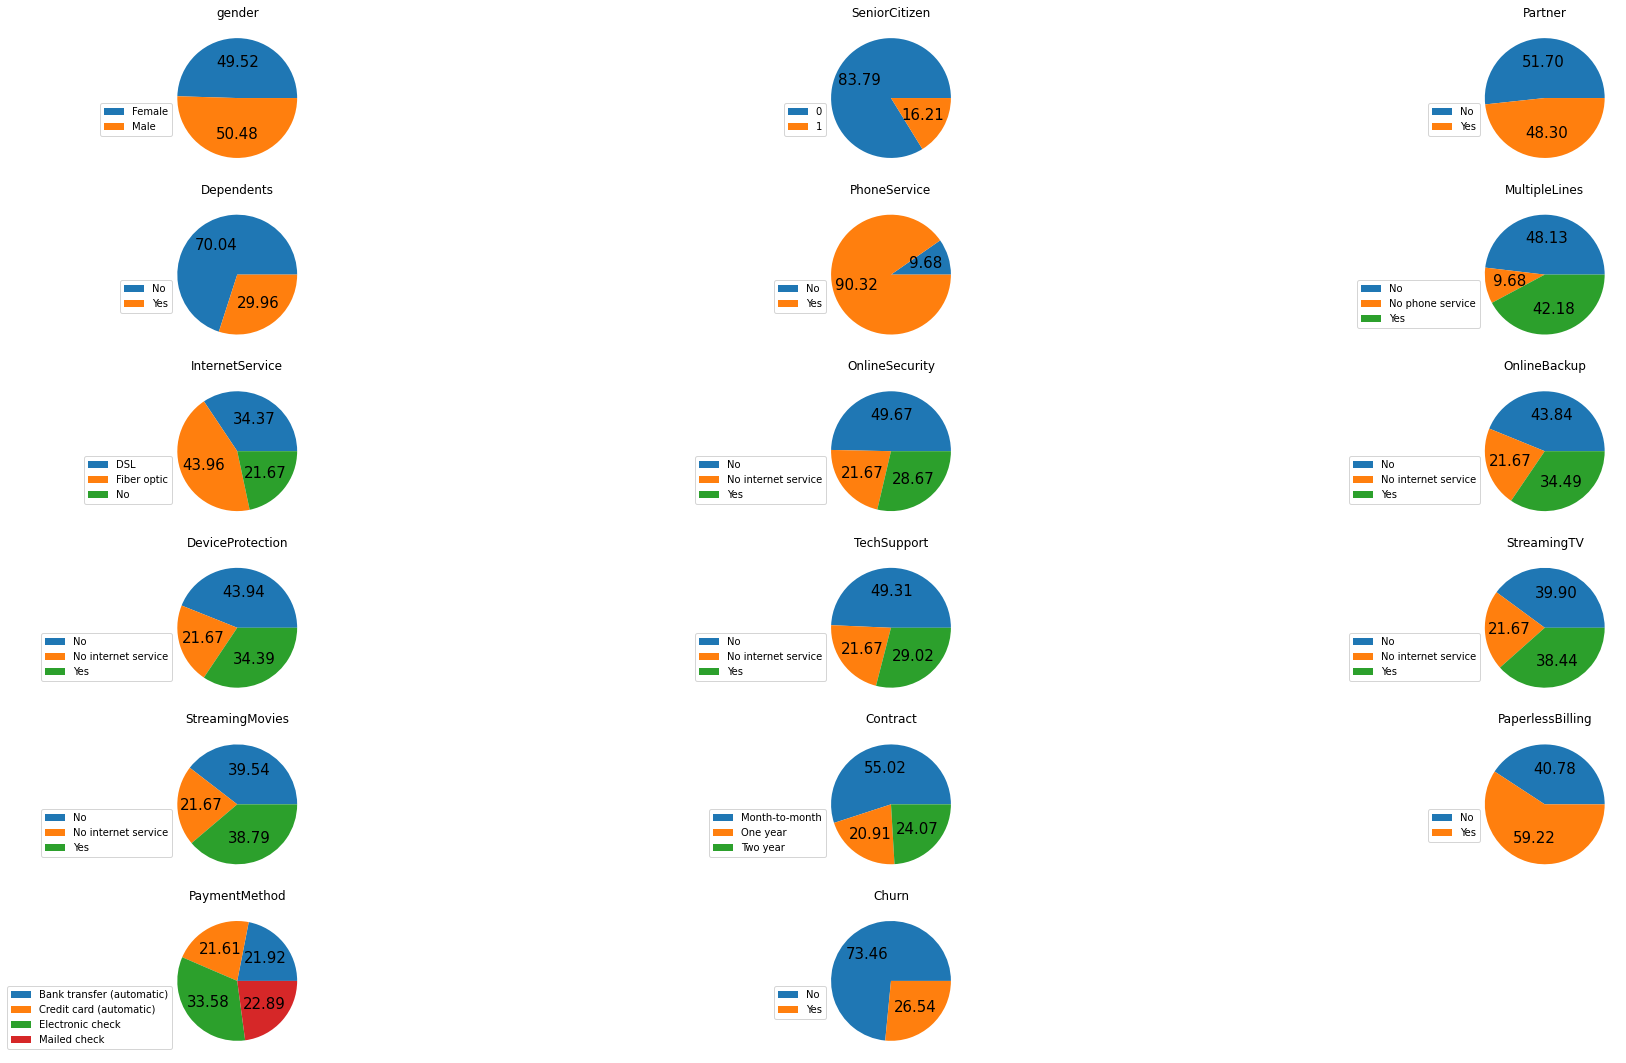

In [386]:
plot_piechart_for_categorical_type(df)

****** Start Debugging ******
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object') 

****** End Debugging ******


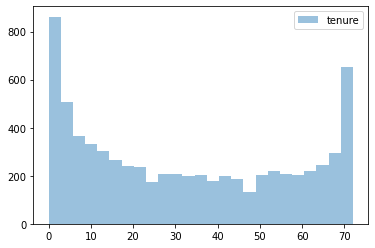

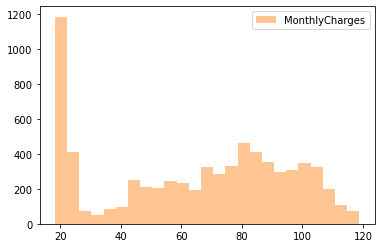

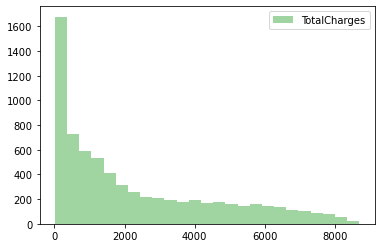

In [387]:
plot_hist(df)

<AxesSubplot:>

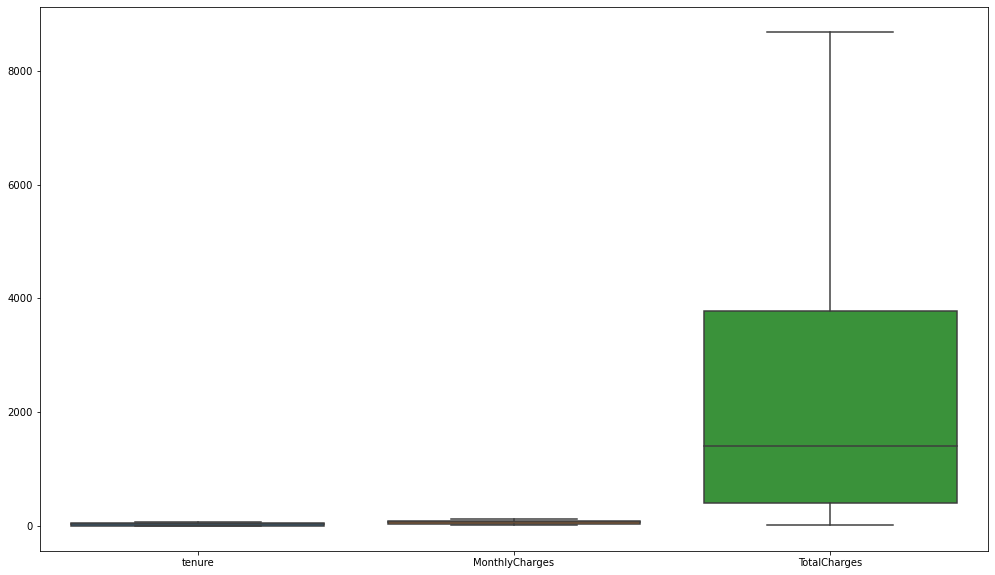

In [388]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df)

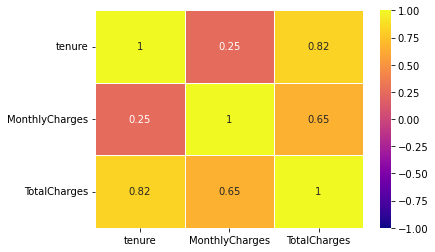

Weakest correlations are 
(('MonthlyCharges', 'TotalCharges'), -0.46296124150003104)
Strong correlations are 
(('tenure', 'TotalCharges'), 0.7318807257210157)
(('tenure', 'MonthlyCharges'), -0.9428397718261667)


In [389]:
analyse_correlation(df)

### <font color=darkorange>  Share insights for Q2.c. 

#### <font color=darkblue> Based on the target 'Churn' - It is not a blanced data.
#### <font color=darkblue> Close to equal number of male and female customers
#### <font color=darkblue> 83% of customers are less than 60 years old
#### <font color=darkblue> 90% of customers are using phone service
#### <font color=darkblue> 55% of customers are renewing contract month-on-month basis - risk

### <font color=darkorange>  Encode all the appropriate Categorical features with the best suitable approach

In [390]:
new_df = encod_category_data(df, [], ['Churn'])
new_df.info()

****** Start Debugging ******
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], dtype='object')  encoded dataframe columns 

****** End Debugging ******
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column  

### <font color=darkorange> Split the data into 80% train and 20% test.

In [391]:
x_train, x_test, y_train, y_test =train_test_split(new_df.drop('Churn',axis=1), new_df['Churn'], test_size=.2,
                                                   random_state=31)
x_train.shape,x_test.shape
x_train.sample(5)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3608,39,75.25,3017.65,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4157,11,45.20,492.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5801,34,75.55,2425.40,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5579,70,93.90,6579.05,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2504,2,75.70,189.20,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### <font color=darkorange> Normalize/Standardize the data with the best suitable approach.

In [392]:
# Since we are using XGBoost - It is not affected by normalization/scale. However the 
# project asking us to do this hence... 

# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()
normalized_x_train = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns
)
#data = x_train.select_dtypes(include=[np.number])
#data = trans.fit_transform(data)
display(normalized_x_train.sample(5))

# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()
normalized_x_test = pd.DataFrame(
    scaler.fit_transform(x_test),
    columns = x_test.columns
)
#data = x_train.select_dtypes(include=[np.number])
#data = trans.fit_transform(data)
display(normalized_x_test.sample(5))

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
169,0.431,0.626,0.303,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2841,0.986,0.590,0.641,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3208,0.528,0.655,0.366,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2742,0.750,0.708,0.560,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
751,0.042,0.068,0.007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
179,0.014,0.526,0.006,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1252,0.986,0.899,0.895,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1341,0.861,0.763,0.673,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1011,0.111,0.510,0.063,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1183,0.750,0.638,0.505,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Model building and Improvement

### <font color=darkorange> Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [393]:
model = XGBClassifier()
model.fit(normalized_x_train, y_train)
y_pred = model.predict(normalized_x_test)
model.score(normalized_x_test,y_test)
accuracy_score(y_test,y_pred)

[11:30:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Software\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7970191625266146

### <font color=darkorange>  Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [394]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# Following parameters where tried in random fashion based on the link above. Few concepts explained in fine tunning
# Parameters are still need some learning.
#model = XGBClassifier(learning_rate=0.1,n_estimators=1000, 
                      #max_depth=4, min_child_weight=1, subsample=0.6,colsample_bytree=0.6,gamma=0.2,scale_pos_weight=1)
model = XGBClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 1000, n_jobs=4, random_state = 0,
                    min_child_weight= 1, colsample_bytree= 0.8, gamma= 0.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)
accuracy_score(y_test,y_pred)

E:\Software\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:30:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.794180269694819

### <font color=darkorange> The best accuracy score we are able to get is 79% irrespective of fine tunning parameters. Hence we should attempt to resample the data as the data is not balanced.

In [395]:
X_resampled , Y_resampled = SMOTENC(categorical_features=[3]).fit_resample(new_df.drop('Churn',axis=1), new_df['Churn'])

In [396]:
x1_train, x1_test, y1_train, y1_test =train_test_split(X_resampled, Y_resampled, test_size=.2,
                                                   random_state=31)
x1_train.shape,x1_test.shape

model = XGBClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 1000, n_jobs=4, random_state = 0,
                    min_child_weight= 1, colsample_bytree= 0.8, gamma= 0.5)
model.fit(x1_train, y1_train)
y1_pred = model.predict(x1_test)
model.score(x1_test,y1_test)
accuracy_score(y1_test,y1_pred)

E:\Software\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:30:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8458937198067633

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:lightgreen;">  Overfit resampling using SMOTENC along with XGB fine tunning is gettings us 85% accuracy. Following parameters are identified learning_rate= 0.2, max_depth= 5, n_estimators= 1000, n_jobs=4, random_state = 0, min_child_weight= 1,colsample_bytree= 0.8,gamma= 0.5

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:2.2em;color:#f98702;"> PART - B - IT DOMAIN


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Machine Learning Workflow 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> The top level function which will call all file related operation to pull data from external storage to python

In [397]:

def file_ops(*file_args):
    print_debug_msg("File processing", file_args)
    data = []
    for file in file_args:
        if (len(data) == 0):
            data = file_to_df(file)
        else:
            data = merge_df(data, file_to_df(file))
    return data

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> The top level function to visualize the data. Today, it create visuals for univariate and bivariate analysis. We need to find a way to do more and find a way to do this appropriate.

In [398]:
def data_visualisation(data):
    print_debug_msg("Data Visualization")
    plot_piechart_for_categorical_type(data)
    category_count_plot(data, 'Churn')
    plot_pair_relationship(data, 'Churn')
    create_box_plot(data)
    analyse_correlation(data)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> The top level function to perform data analysis and provide inferences. We need to check the methodology and make sure it is 100% automated for data variances

In [399]:
def data_analysis(df):
    print_debug_msg("Data Analysis")
    five_point_summary(df)
    find_nan(df)
    return df

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Preprocessing functions specific to this project. We should generalize it going forward.

In [400]:
def data_preprocessing(df):
    print_debug_msg("Data Preprocessing")
    cat_list = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                'PaperlessBilling', 'PaymentMethod', 'Churn','SeniorCitizen']
    data = convert_to_category(cat_list, df)
    data = drop_column(['customerID'], data)
    data = replace_nan_with_mean(data, ['TotalCharges'])
    print_df_details(data)
    return data

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Preparation functions to get the dataset ready for M/L algorithm

In [401]:
def data_preparation(df):
    data = encod_category_data(df, [], ['Churn'])
    X_resampled , Y_resampled = do_resample(data, 'Churn')
    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=.2, random_state=31)
    X_train = standardize_or_normalize(X_train)
    X_test = standardize_or_normalize(X_test)
    print_df_details(X_train)
    return X_train, X_test, Y_train, Y_test

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Functions to call all training model, prepare dashboard and render on the screen

In [402]:
def model_dashboard(report):
    print_debug_msg("Model Dashboard")
    report = report.reset_index(drop=True)
    print_df_details(report)
    return report

In [403]:
def model_training(X_train, X_test, Y_train, Y_test):
    print_debug_msg("Model traininig")
    report = eval_knn(X_train,  Y_train, X_test, Y_test)
    report = merge_df(report, eval_lr(X_train, Y_train, X_test, Y_test))
    report = merge_df(report, eval_svm(X_train,  Y_train, X_test, Y_test))
    report = merge_df(report, eval_dtc(X_train,  Y_train, X_test, Y_test))
    report = merge_df(report, eval_stacking(X_train, Y_train, X_test, Y_test))
    report = merge_df(report, eval_xgboost(X_train,  Y_train, X_test, Y_test))
    report = model_dashboard(report)
    return report

In [404]:
def select_model(report):
    df = report.loc[report['Report'] == 'Test']
    max = df['accuracy'].idxmax()
    model_name = df['Model'][max]
    print(f"\n {model_name} shows better result and hence selecting it..details are")
    display(report.iloc[max])
    print(df['Model'][df['accuracy'].idxmax()])
    #print(df['Model'][df['precision'].idxmax()])
    #print(df['Model'][df['recall'].idxmax()])
    #print(df['Model'][df['f1-score'].idxmax()])
    model = get_model(model_name)
    return model

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> The mainfunction implementing workflow by calling chain of functions defined earlier.

In [405]:
def ml_workflow():
    print("Starting workflow")
    bootstrap()
    
    data = file_ops('TelcomCustomer-Churn_1.csv','TelcomCustomer-Churn_2.csv')
    data = data_analysis(data)
    data = data_preprocessing(data)
    data_visualisation(data)
    X_train, X_test, Y_train, Y_test = data_preparation(data)
    report = model_training(X_train, X_test, Y_train, Y_test)
    print(report)
    model = select_model(report)
    save_model(model, X_train, Y_train)
    load_model_and_test('model.pkl',X_test, Y_test)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:darkblue;"> M/L Workflow starts here

Starting workflow
****** Start Debugging ******
File processing ('TelcomCustomer-Churn_1.csv', 'TelcomCustomer-Churn_2.csv') 

****** End Debugging ******

****** Start Dataframe Details ******
Dataframe Shape is 
(7043, 10)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
None
Dataframe random records 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
6841,8217-QYOHV,Male,0,No,No,5,Yes,No,DSL,Yes
5335,3327-YBAKM,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes
6791,5204-QZXPU,Male,0,No,No,19,No,No phone service,DSL,No
5327,1270-XKUCC,Female,0,Yes,Yes,30,Yes,No,No,No internet service
160,8992-VONJD,Female,0,No,Yes,13,Yes,No,DSL,Yes


****** End Dataframe Details ******


****** Start Dataframe Details ******
Dataframe Shape is 
(7043, 12)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7032 non-null   float64
 11  Churn             7043 non-null   object 
dtypes: float64(2), object(10)
memory usage: 660.4+ KB
None
Dataframe random records 


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2648,6131-FOYAS,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,59.60,2094.90,No
100,6380-ARCEH,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2929,2606-PKWJB,Yes,No,Yes,No,No,One year,No,Mailed check,40.25,1564.05,No
2898,6505-OZNPG,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,63.40,348.80,No
3605,8148-BPLZQ,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,49.80,1734.20,No


****** End Dataframe Details ******

****** Start Debugging ******
Data Analysis 

****** End Debugging ******


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162,0.369,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371,24.559,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[TotalCharges] is having some null or empty row or missing value



['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] can be a category column



****** Start Debugging ******
1 7043 7043 1056 customerID 

****** End Debugging ******
****** Start Debugging ******
3555 2 7043 1056 gender 

****** End Debugging ******
****** Start Debugging ******
nan nan 7043 1056 SeniorCitizen 

****** End Debugging ******
****** Start Debugging ******
3641 2 7043 1056 Partner 

****** End Debugging ******
****** Start Debugging ******
4933 2 7043 1056 Dependents 

****** End Debugging ******
****** Start Debugging ******
nan nan 7043 1056 tenure 

****** End Debugging ******
****** Start Debugging ******
6361 2 7043 1056 PhoneService 

****** End Debugging ******
****** Start Debugging ******
3390 3 7043 1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
638,Male,1,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.55,5794.65,Yes
1464,Male,0,No,No,9,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Mailed check,64.95,547.80,No
6229,Male,0,Yes,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.45,6227.50,No
149,Male,0,Yes,Yes,15,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.40,No
456,Male,0,Yes,Yes,28,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),92.90,2768.35,No


****** End Dataframe Details ******

****** Start Debugging ******
Data Visualization 

****** End Debugging ******
Total categorical column is 17 and identified rows are 6 and identified columns are 3


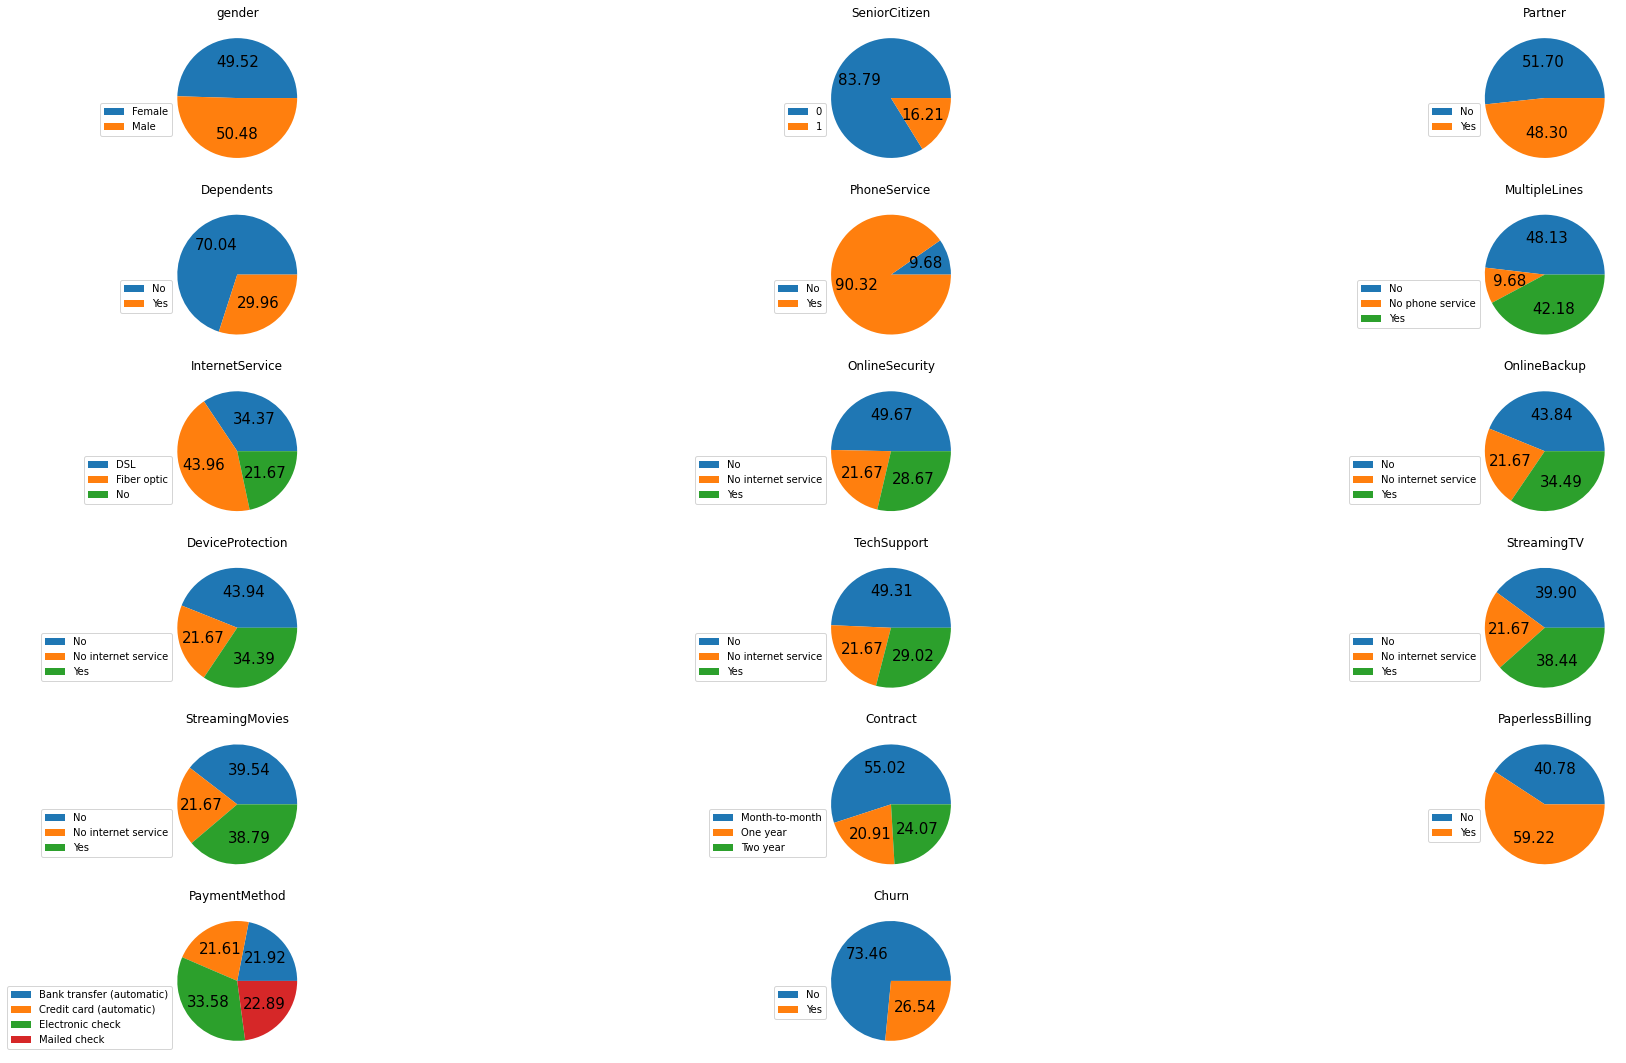

****** Start Debugging ******
count plot Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype='object') 

****** End Debugging ******


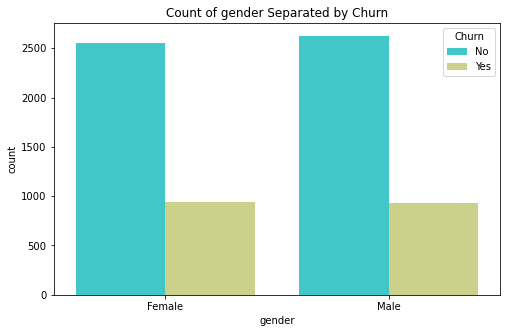

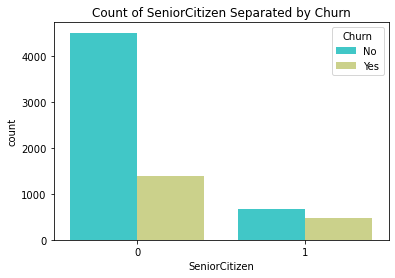

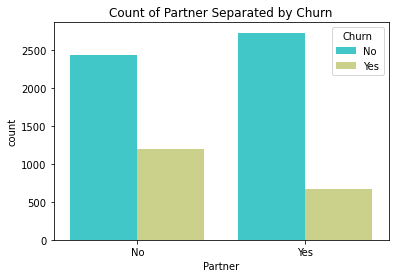

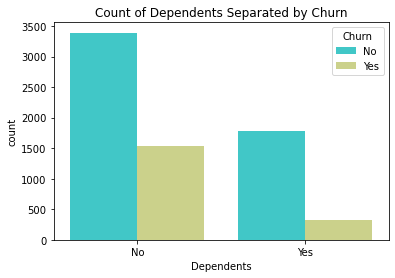

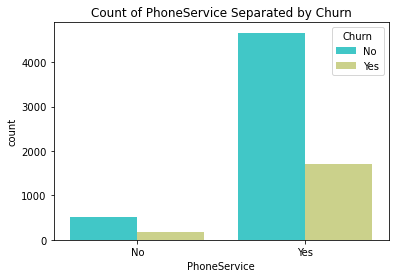

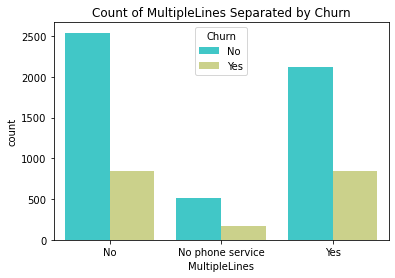

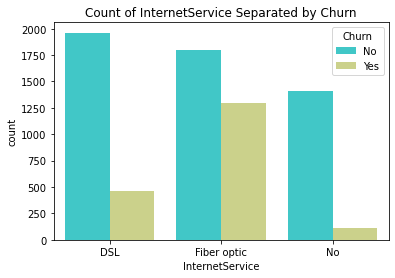

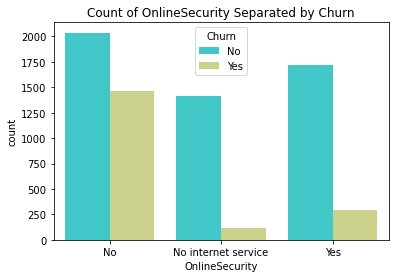

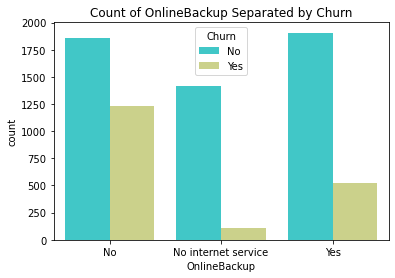

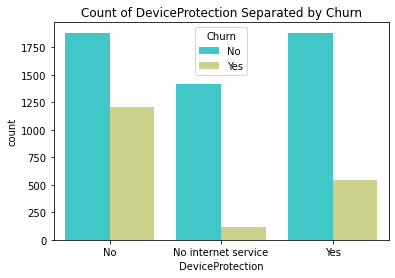

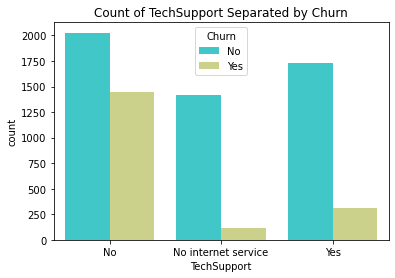

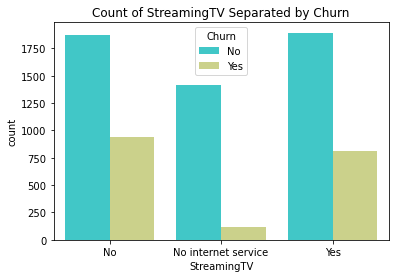

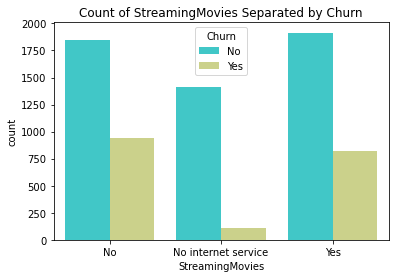

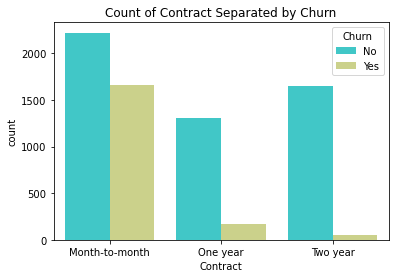

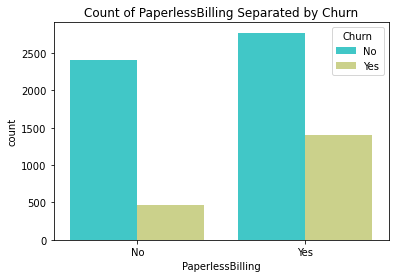

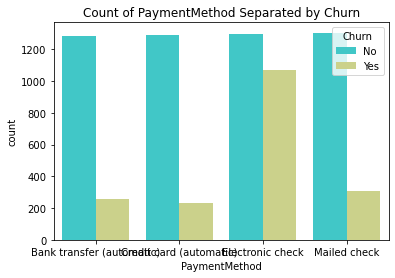

<Figure size 288x288 with 0 Axes>

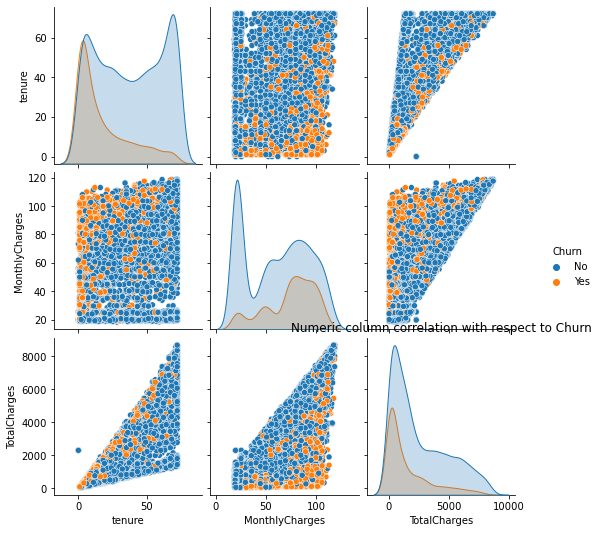

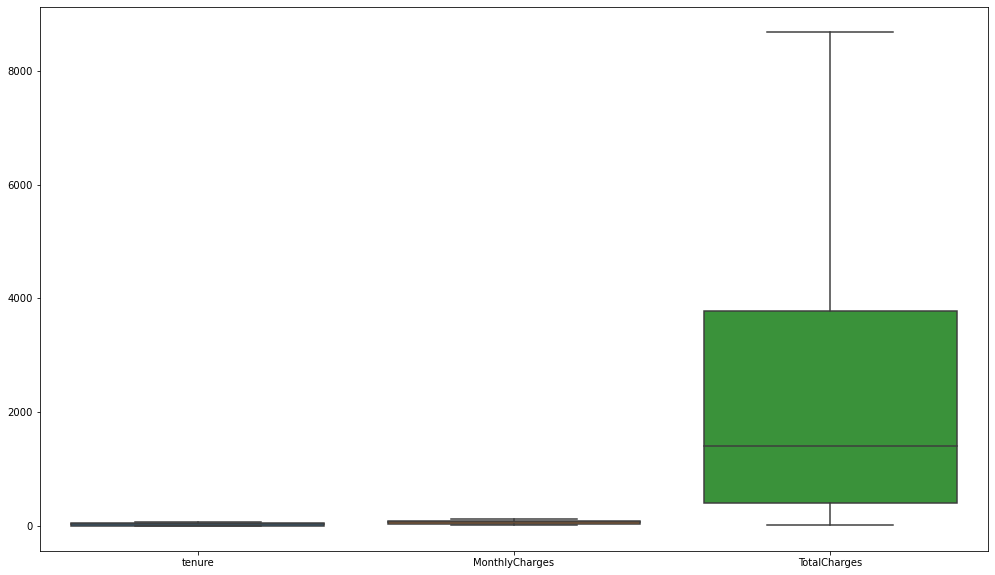

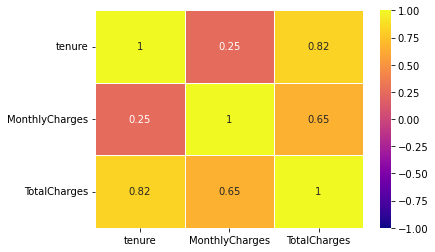

Weakest correlations are 
(('MonthlyCharges', 'TotalCharges'), -0.46296124150003104)
Strong correlations are 
(('tenure', 'TotalCharges'), 0.7318807257210157)
(('tenure', 'MonthlyCharges'), -0.9428397718261667)
****** Start Debugging ******
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMetho

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5029,0.722,0.801,5.920e-01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1041,0.014,0.006,5.770e-06,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5530,0.042,0.566,2.312e-02,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,0.639,0.858,5.591e-01,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5219,0.458,0.764,3.450e-01,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


****** End Dataframe Details ******

****** Start Debugging ******
Model traininig 

****** End Debugging ******
****** Start Debugging ******
11  is the measured good K value 

****** End Debugging ******
No     1053
Yes    1017
Name: Churn, dtype: int64
[[782 271]
 [133 884]]


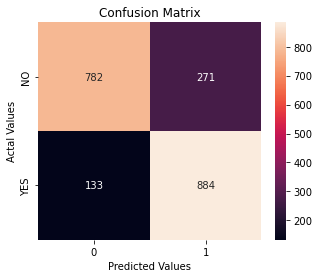

No     1053
Yes    1017
Name: Churn, dtype: int64
[[836 217]
 [172 845]]


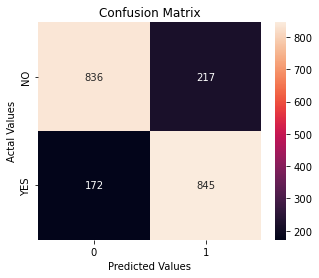

No     1053
Yes    1017
Name: Churn, dtype: int64
[[855 198]
 [183 834]]


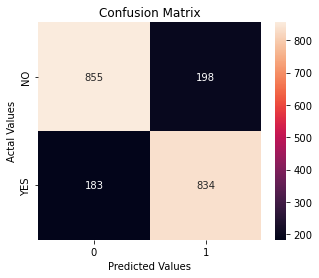

No     1053
Yes    1017
Name: Churn, dtype: int64
[[810 243]
 [206 811]]


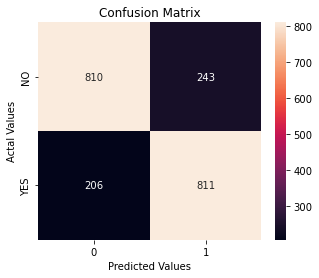

No     1053
Yes    1017
Name: Churn, dtype: int64
[[833 220]
 [233 784]]


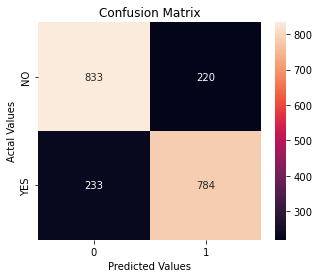

E:\Software\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
No     1053
Yes    1017
Name: Churn, dtype: int64
[[867 186]
 [161 856]]


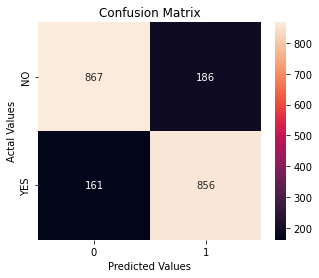

****** Start Debugging ******
Model Dashboard 

****** End Debugging ******

****** Start Dataframe Details ******
Dataframe Shape is 
(12, 7)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      12 non-null     object 
 1   accuracy   12 non-null     float64
 2   precision  12 non-null     float64
 3   recall     12 non-null     float64
 4   f1-score   12 non-null     float64
 5   support    0 non-null      object 
 6   Report     12 non-null     object 
dtypes: float64(4), object(3)
memory usage: 800.0+ bytes
None
Dataframe random records 


,Model,accuracy,precision,recall,f1-score,support,Report
2,LogisticRegression,0.828,0.829,0.828,0.828,None,Train
7,DTC,0.783,0.784,0.783,0.783,None,Test
6,DTC,0.998,0.998,0.998,0.998,None,Train
5,SVM,0.816,0.816,0.816,0.816,None,Test
1,KNN,0.805,0.811,0.805,0.804,None,Test


****** End Dataframe Details ******

          Model         accuracy  precision  recall  f1-score support Report
0                  KNN    0.998     0.998     0.998    0.998    None   Train
1                  KNN    0.805     0.811     0.805    0.804    None    Test
2   LogisticRegression    0.828     0.829     0.828    0.828    None   Train
3   LogisticRegression    0.812     0.813     0.812    0.812    None    Test
4                  SVM    0.843     0.843     0.843    0.843    None   Train
5                  SVM    0.816     0.816     0.816    0.816    None    Test
6                  DTC    0.998     0.998     0.998    0.998    None   Train
7                  DTC    0.783     0.784     0.783    0.783    None    Test
8             Stacking    0.825     0.825     0.825    0.825    None   Train
9             Stacking    0.781     0.781     0.781    0.781    None    Test
10             Xgboost    0.979     0.979     0.979    0.979    None   Train
11             Xgboost    0.832     0.8

Model        Xgboost
accuracy       0.832
precision      0.833
recall         0.832
f1-score       0.832
support         None
Report          Test
Name: 11, dtype: object

Xgboost
[11:31:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Software\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




 FINISHED - You don't see this if there is a error 




In [406]:
ml_workflow()